In [3]:
library(tidyverse)
theme_set(theme_bw())
options(repr.plot.height=4, repr.plot.width = 7)

In [77]:
df <- read_csv('data/treasury_income.csv')

Parsed with column specification:
cols(
  ds = col_date(format = ""),
  mtd = col_integer(),
  rev = col_integer(),
  type = col_character(),
  ytd = col_integer()
)


Warning message in self$trans$transform(x):
“NaNs produced”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 117 rows containing missing values (geom_point).”

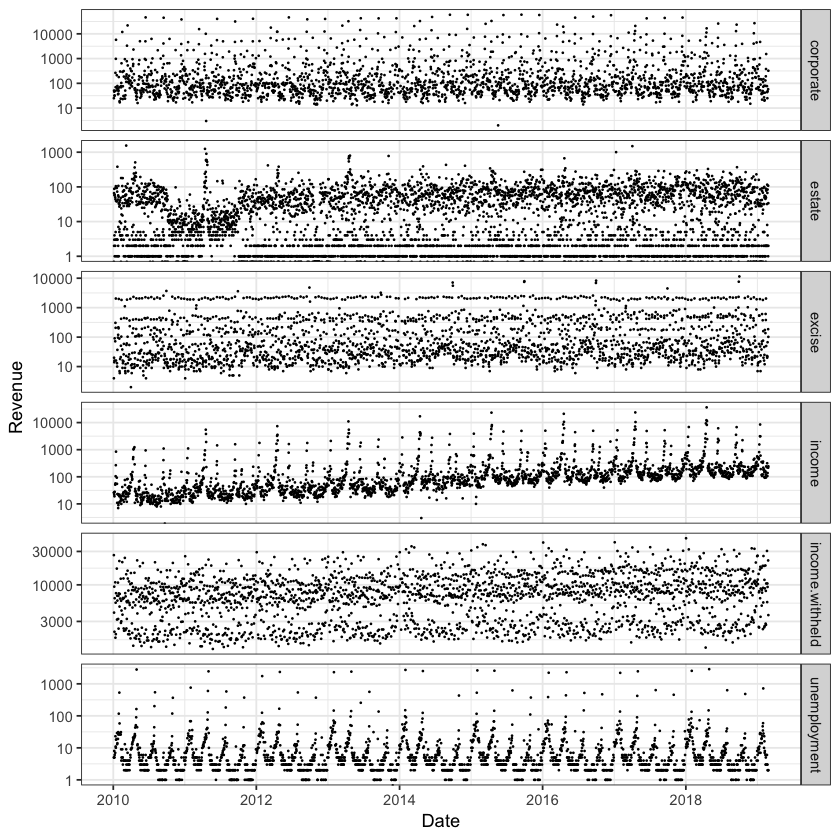

In [7]:
options(repr.plot.height=7, repr.plot.width = 7)
df %>% 
  filter(type != 'railroad') %>%
  ggplot(aes(x = ds, y = rev)) + 
  geom_point(size = .1) + 
  facet_grid(type ~ ., scales = 'free_y') +
  xlab('Date') +
  ylab('Revenue') +
  scale_y_log10()

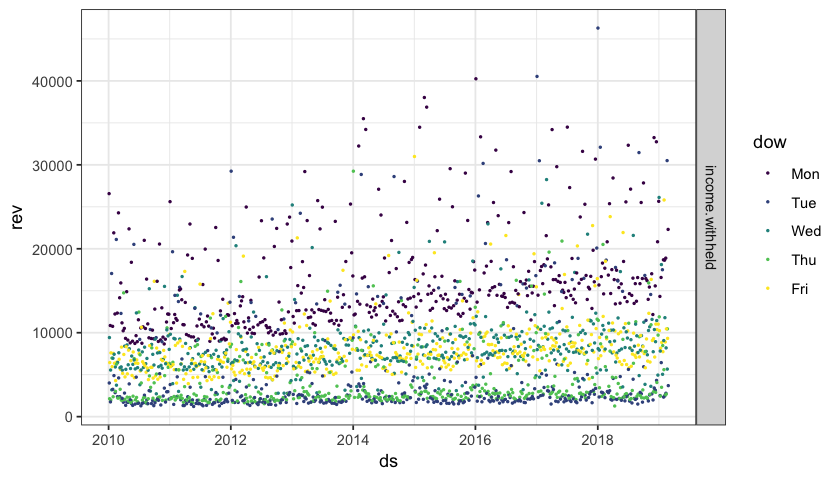

In [9]:
options(repr.plot.height=4, repr.plot.width = 7)
df %>% 
  mutate(dow = wday(ds, label = TRUE)) %>%
  filter(type == 'income.withheld') %>%
  ggplot(aes(x = ds, y = rev, colour = dow)) + 
  geom_point(size = .3) + 
  facet_grid(type ~ ., scales = 'free_y')

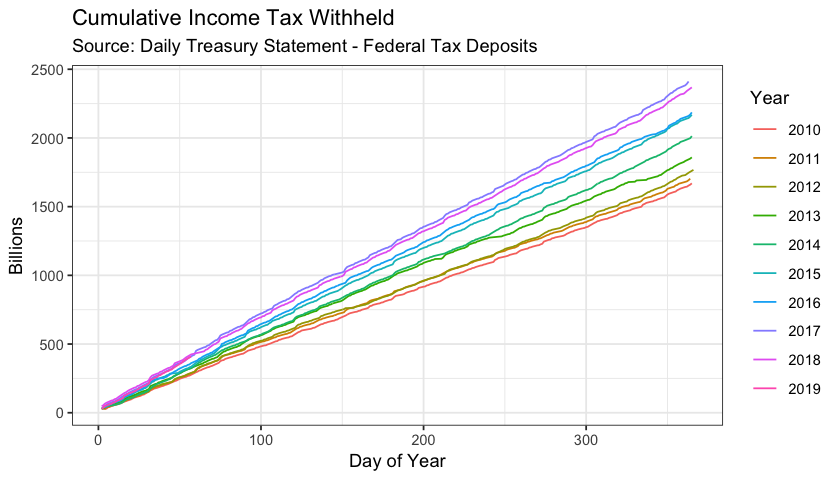

In [27]:
options(repr.plot.height=4, repr.plot.width = 7)
df %>% 
  filter(type == 'income.withheld') %>%
  mutate(Year = year(ds),
         doy = yday(ds)) %>%
  group_by(Year) %>%
  arrange(ds) %>%
  mutate(cum.rev = cumsum(rev)) %>%
  ungroup() %>%
  mutate(Year = factor(Year)) %>%
  ggplot(aes(x = doy, y = cum.rev/1000, colour = Year)) + 
  geom_line() +
  xlab('Day of Year') +
  ylab('Billions') +
  ggtitle('Cumulative Income Tax Withheld', 'Source: Daily Treasury Statement - Federal Tax Deposits')

In [29]:
library(RcppRoll)

Warning message:
“Removed 6 rows containing missing values (geom_path).”

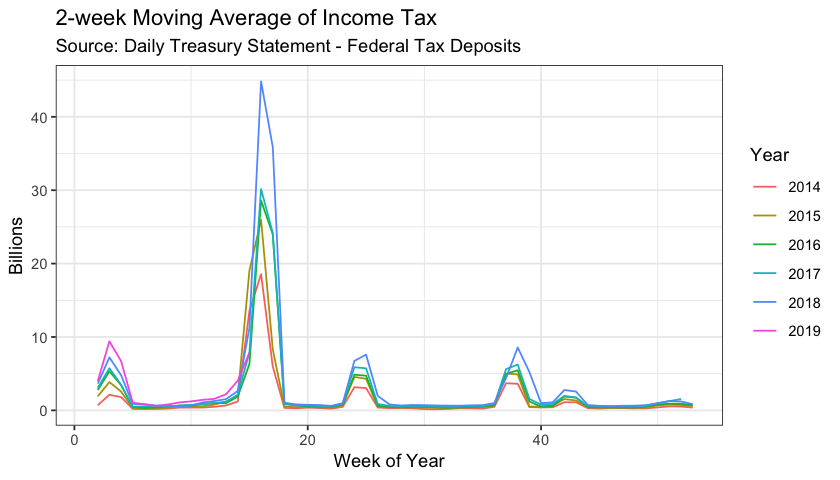

In [91]:
options(repr.plot.height=4, repr.plot.width = 7)
df %>% 
  filter(type == 'income') %>%
  mutate(Year = year(ds),
         wk = week(ds)) %>%
  group_by(Year, wk) %>%
  summarise(rev = sum(rev)) %>%
  ungroup() %>%
  group_by(Year) %>%
  arrange(wk) %>%
  mutate(mov_rev = 0.5 * (rev + lag(rev))) %>%
  ungroup() %>%
  filter(Year >= 2014) %>%
  mutate(Year = factor(Year)) %>%
  ggplot(aes(x = wk, y = mov_rev/1000, colour = Year)) + 
  geom_line() +
  xlab('Week of Year') +
  ylab('Billions') +
  ggtitle('2-week Moving Average of Income Tax', 
          'Source: Daily Treasury Statement - Federal Tax Deposits')

In [89]:
df %>%
  group_by(ds) %>%
  summarise() %>%
  mutate(yd = yday(ds)) %>%
  filter(month(ds) == 4, day(ds) == 15)

ds,yd
2013-04-15,105
2014-04-15,105
2015-04-15,105
2016-04-15,106


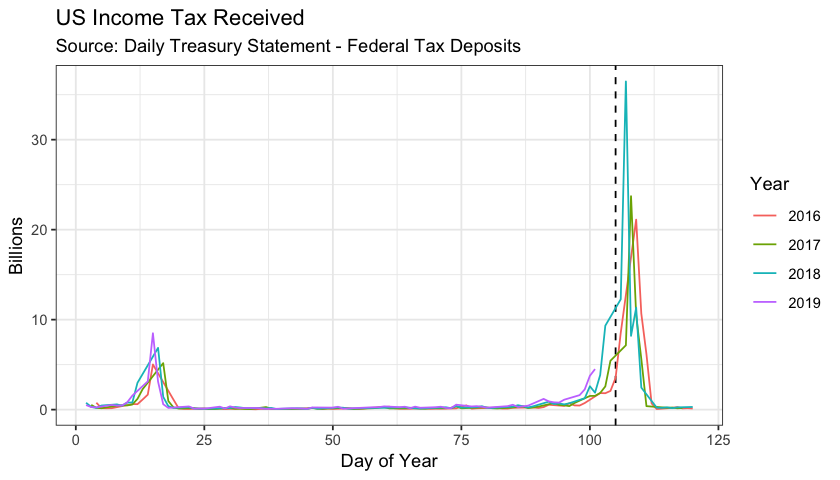

In [90]:
options(repr.plot.height=4, repr.plot.width = 7)
df %>% 
  filter(type == 'income') %>%
  mutate(Year = year(ds), yd = yday(ds)) %>%
  filter(Year >= 2016, yd <= 120) %>%
  mutate(Year = factor(Year)) %>%
  ggplot(aes(x = yd, y = rev/1000, colour = Year)) + 
  geom_vline(xintercept = 105, linetype = 'dashed') +
  geom_line() +
  xlab('Day of Year') +
  ylab('Billions') +
  ggtitle('US Income Tax Received', 
          'Source: Daily Treasury Statement - Federal Tax Deposits')

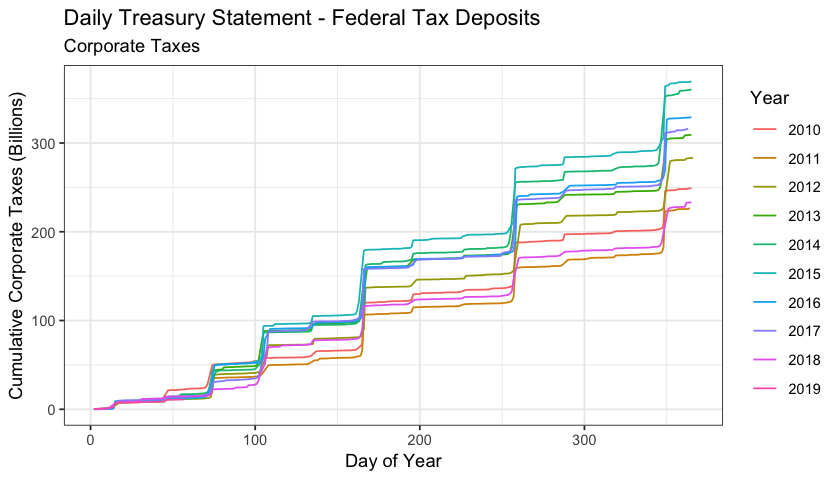

In [28]:
options(repr.plot.height=4, repr.plot.width = 7)
df %>% 
  filter(type == 'corporate') %>%
  mutate(`Year` = factor(year(ds)),
         doy = yday(ds)) %>%
  group_by(`Year`) %>%
  arrange(ds) %>%
  mutate(cum.rev = cumsum(rev)) %>%
  ggplot(aes(x = doy, y = cum.rev/1000, colour = `Year`)) + 
  geom_line() +
  xlab('Day of Year') +
  ylab('Cumulative Corporate Taxes (Billions)') +
  ggtitle('Daily Treasury Statement - Federal Tax Deposits', 'Corporate Taxes')